# Agregación de datos por categoría

Agregar datos significa combinar los datos con alggún criterio, el más típico es con una variable categórica, para agrupar todos los datos con una misma categoría.  (Cluster ¿?)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [3]:
#Creamos datos aleatorios para género y para ingresos
tamaño_data = 500  

gender_data = []
income_data = []

for i in range(0,tamaño_data):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[1:10]

['Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female']

In [5]:
income_data[1:10]

['Rich',
 'Rich',
 'Poor',
 'Middle Class',
 'Rich',
 'Rich',
 'Middle Class',
 'Rich',
 'Rich']

In [6]:
# Ya podemos crear datos ya numéricos para altura, pesos, edad y valor ingresos. 
# Z -> N(0, 1)   pero podemos cambiar, recuerda  N(m, sd) = m + s * Z  (Distribucipon NORMAL con media m y SD sd)

height = 160 + 30 * np.random.randn(tamaño_data)
weight = 65 + 25 * np.random.randn(tamaño_data)
age = 30 + 12 * np.random.randn(tamaño_data)
income = 18000 + 3500 * np.random.randn(tamaño_data)

In [7]:
data = pd.DataFrame(
    {
        "Gender":gender_data, 
        "Economic Status": income_data, 
        "Height": height, 
        "Weight": weight, 
        "Age": age, 
        "Incom": income
    }
)

In [8]:
data.head()  # Ya podemos ver el dummy dataset creado!

,Gender,Economic Status,Height,Weight,Age,Incom
0,Female,Poor,154.937557,94.631338,31.743540,19894.785173
1,Female,Rich,140.352931,61.346379,20.574083,20185.805416
2,Male,Rich,219.409511,72.530690,17.344611,18443.359332
3,Male,Poor,181.499835,25.944781,34.145403,17971.059307
4,Female,Middle Class,195.290362,67.949121,20.976135,12426.166203


## Agrupación de datos
Simplemente usamos <b>groupby</b>. Tener cuidado que esto lo que genera es un dato de tipo <b>DataFrameGroupBy</b> que tendrá dos atribos:
* El nombre 
* El index de cada valor 

In [9]:
grouped_gender = data.groupby("Gender")

In [10]:
# acá podemos ver el los grupos y los index.
grouped_gender.groups  

{'Female': Int64Index([  0,   1,   4,   5,   6,   7,   9,  12,  16,  19,
             ...
             475, 478, 480, 481, 483, 487, 488, 491, 497, 499],
            dtype='int64', length=239),
 'Male': Int64Index([  2,   3,   8,  10,  11,  13,  14,  15,  17,  18,
             ...
             485, 486, 489, 490, 492, 493, 494, 495, 496, 498],
            dtype='int64', length=261)}

In [11]:
#acá podemos ver los datos por cada uno de las agrupaciones complet
for names, groups in grouped_gender:  
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age         Incom
0    Female            Poor  154.937557   94.631338  31.743540  19894.785173
1    Female            Rich  140.352931   61.346379  20.574083  20185.805416
4    Female    Middle Class  195.290362   67.949121  20.976135  12426.166203
5    Female            Rich  173.806969   90.084685  35.999756  17390.838649
6    Female            Rich  137.549830   43.717860  28.209443  25069.405005
7    Female    Middle Class  156.269938   84.213981  15.472264  19276.099968
9    Female            Rich  132.307755   84.946686  40.488903  21272.801587
12   Female            Poor  173.669006   66.856031  22.796151  14328.841164
16   Female            Rich  148.076617   26.481294  22.835457  15808.061775
19   Female            Rich  135.119200   60.948792  39.259785  17642.669229
21   Female    Middle Class  169.918626   72.935584  24.698669  18930.174821
22   Female            Rich  157.426858   54.968691  21.309061  15172

In [12]:
# Si sólo quiero UNO de los grupos, lo podemos obtener de la siguiente manera, dándo el nombre del grupo que queremos: 
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Incom
0,Female,Poor,154.937557,94.631338,31.743540,19894.785173
1,Female,Rich,140.352931,61.346379,20.574083,20185.805416
4,Female,Middle Class,195.290362,67.949121,20.976135,12426.166203
5,Female,Rich,173.806969,90.084685,35.999756,17390.838649
6,Female,Rich,137.549830,43.717860,28.209443,25069.405005
7,Female,Middle Class,156.269938,84.213981,15.472264,19276.099968
9,Female,Rich,132.307755,84.946686,40.488903,21272.801587
12,Female,Poor,173.669006,66.856031,22.796151,14328.841164
16,Female,Rich,148.076617,26.481294,22.835457,15808.061775
19,Female,Rich,135.119200,60.948792,39.259785,17642.669229


Se pueden hacer agrupaciones por más de una categoría. Se debe tener en cuenta que el número de agrupaciones resultantes es el número de valores que tenga cada categoría multiplicadas entre sí. Por ejemplo, si agrupamos por "Gender" y " Economic Status": 

* Gender tiene 2 categorías
* Economic Status tiene 3 categorías

El resultado de la agrupación serán: 

* 2 x 3 = 6.   6 Grupos. 

In [13]:
#Acá el ejemplo en código de lo anterior: 
double_grouped = data.groupby(["Gender", "Economic Status"])

In [14]:
#Verificamos el tamaño y en efecto es el producto del tamaño de cada categoría
len(double_grouped)

6

In [15]:
# para poder verlos lo podemos ver igual que antes: 
for names, groups in double_grouped:  
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age         Incom
4    Female    Middle Class  195.290362   67.949121  20.976135  12426.166203
7    Female    Middle Class  156.269938   84.213981  15.472264  19276.099968
21   Female    Middle Class  169.918626   72.935584  24.698669  18930.174821
28   Female    Middle Class  206.253995  119.955983  23.653184  16370.549153
30   Female    Middle Class  161.090994   94.951406  29.756030  11064.211353
52   Female    Middle Class  126.575246   91.055326  22.563971  15223.081689
69   Female    Middle Class  198.341061   64.225374  40.778750  14279.183393
73   Female    Middle Class  134.667749   89.393743  25.164190  21280.220865
85   Female    Middle Class  176.021872   74.261833  48.109227  18164.862853
86   Female    Middle Class  196.084991  113.140695  28.814549  18784.598655
95   Female    Middle Class  124.330312   45.040229  21.924758  11217.647140
99   Female    Middle Class  157.601900   88.1731

## Operaciones sobre datos agrupados

In [16]:
#suma de todos los datos agrupados. 
double_grouped.sum()

Height       Weight          Age         Incom
Gender Economic Status                                                      
Female Middle Class     10152.149678  4227.893881  1728.857959  1.093320e+06
       Poor             14181.618215  5800.281398  2461.386619  1.590760e+06
       Rich             13881.830442  5442.307542  2702.592408  1.604618e+06
Male   Middle Class     13600.662722  5598.704639  2646.398682  1.489929e+06
       Poor             14167.637219  5956.815855  2621.123728  1.618091e+06
       Rich             13492.909601  5085.615488  2446.882636  1.450262e+06

In [18]:
#conocer la media de los cada uno de los datos por grupo.
double_grouped.mean()

Height     Weight        Age         Incom
Gender Economic Status                                                
Female Middle Class     163.744350  68.191837  27.884806  17634.197904
       Poor             159.344025  65.171701  27.656029  17873.702503
       Rich             157.748073  61.844404  30.711277  18234.300044
Male   Middle Class     158.147241  65.101217  30.772078  17324.757572
       Poor             155.688321  65.459515  28.803557  17781.214496
       Rich             160.629876  60.543042  29.129555  17265.027815

In [19]:
# Conocer el tamaño de la información de los datos por grupo
double_grouped.size()

Gender  Economic Status
Female  Middle Class       62
        Poor               89
        Rich               88
Male    Middle Class       86
        Poor               91
        Rich               84
dtype: int64

In [20]:
# Conocer los estadíticos básicos en resumen para los datos agrupados.
double_grouped.describe()

Age                                              \
                       count       mean        std        min        25%   
Gender Economic Status                                                     
Female Middle Class     62.0  27.884806  11.884159   2.901385  19.128350   
       Poor             89.0  27.656029  13.157857  -3.693577  20.250124   
       Rich             88.0  30.711277  11.099220   8.177306  21.923865   
Male   Middle Class     86.0  30.772078  11.368650   5.624697  22.259952   
       Poor             91.0  28.803557  12.115700 -14.150275  21.344150   
       Rich             84.0  29.129555  11.708690  -6.074358  20.241976   

                                                        Height              \
                              50%        75%        max  count        mean   
Gender Economic Status                                                       
Female Middle Class     28.123491  36.348458  61.810552   62.0  163.744350   
       Poor             26.396344  35.370347  67.906627   89.0  159.344025   
       Rich             30.119753  36.699676  59.952663   88.0  157.748073   
Male   Middle Class     30.348007  39.118478  56.572520   86.0  158.147241   
       Poor             28.868120  34.469995  65.638937   91.0  155.688321   
       Rich             29.803885  35.234470  58.573131   84.0  160.629876   

                           ...             Incom               Weight  \
                           ...               75%           max  count   
Gender Economic Status     ...                                          
Female Middle Class        ...      20434.119479  24990.440484   62.0   
       Poor                ...      19894.785173  30753.072952   89.0   
       Rich                ...      20363.473509  25069.405005   88.0   
Male   Middle Class        ...      19238.118367  24690.073541   86.0   
       Poor                ...      20139.280442  26464.520216   91.0   
       Rich                ...      19775.638218  26418.337075   84.0   

                                                                               \
                             mean        std        min        25%        50%   
Gender Economic Status                                                          
Female Middle Class     68.191837  25.466104   4.492862  55.358752  70.253569   
       Poor             65.171701  20.697038  13.457176  53.154184  64.306751   
       Rich             61.844404  24.491421 -11.293372  45.784604  61.127559   
Male   Middle Class     65.101217  26.781660  -8.963730  44.846499  68.864009   
       Poor             65.459515  25.675081  -1.531484  48.688094  66.000479   
       Rich             60.543042  23.137346   8.279357  43.145561  59.743593   

                                               
                              75%         max  
Gender Economic Status                         
Female Middle Class     87.711428  119.955983  
       Poor             80.563365  110.112429  
       Rich             80.105459  112.321053  
Male   Middle Class     82.395816  119.723332  
       Poor             83.553560  121.208625  
       Rich             74.706855  125.179322  

[6 rows x 32 columns]

In [22]:
#pero es mucho más comodo obtener cada variable agrupada:
grouped_income = double_grouped["Incom"]
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      62.0  17634.197904  3841.728729   9260.839912   
       Poor              89.0  17873.702503  3210.031476  10436.831891   
       Rich              88.0  18234.300044  3076.100768   9457.452519   
Male   Middle Class      86.0  17324.757572  2898.583438   9839.103815   
       Poor              91.0  17781.214496  3463.225394  10727.292959   
       Rich              84.0  17265.027815  3594.132231   7936.320087   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15304.867017  17322.947409  20434.119479  24990.440484  
       Poor             15621.373747  17682.426109  19894.785173  30753.072952  
       Rich             15922.668862  18128.275251  20363.473509  25069.405005  
Male   Middle Class     16071.642551  17119.222606  19238.118367  24690.073541  
       Poor             14999.881562  17971.059307  20139.280442  26464.520216  
       Rich             14570.106486  16969.647191  19775.638218  26418.337075

In [25]:
#Agregate es una modificación del group by, para hacer lo que necesito a la vez (estadísticos básicos por ejemplo)
double_grouped.aggregate(
    {
        "Incom" : np.sum,    # Suma de todos los valores 
        "Age" : np.mean,      # Media de los valores 
        "Height" :  np.std    # Desviación estándar de los valores
    }
)

Incom        Age     Height
Gender Economic Status                                    
Female Middle Class     1.093320e+06  27.884806  30.418280
       Poor             1.590760e+06  27.656029  33.281764
       Rich             1.604618e+06  30.711277  27.797608
Male   Middle Class     1.489929e+06  30.772078  30.580337
       Poor             1.618091e+06  28.803557  29.264098
       Rich             1.450262e+06  29.129555  30.335120

In [27]:
# Supongamos que queremos en vez de la media de las edades, queremos la tipificación (media/desviación)
# Esto se hace haciendo uso de la función LAMBDA que es para aplicar operaciones sobre un dato en aggregate
double_grouped.aggregate(
    {
        "Age" : np.mean, 
        "Height" : lambda h: np.mean(h)/np.std(h)  #Es cada h
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     27.884806  5.427035
       Poor             27.656029  4.814854
       Rich             30.711277  5.707401
Male   Middle Class     30.772078  5.201866
       Poor             28.803557  5.349588
       Rich             29.129555  5.326982

In [28]:
# Si se quiere aplicar las mismas funciones a los datos agrupados, se puede hacer pasando como parámetros las operaciones.  
double_grouped.aggregate([np.sum, np.mean, np.std]) 

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     10152.149678  163.744350  30.418280  4227.893881   
       Poor             14181.618215  159.344025  33.281764  5800.281398   
       Rich             13881.830442  157.748073  27.797608  5442.307542   
Male   Middle Class     13600.662722  158.147241  30.580337  5598.704639   
       Poor             14167.637219  155.688321  29.264098  5956.815855   
       Rich             13492.909601  160.629876  30.335120  5085.615488   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     68.191837  25.466104  1728.857959  27.884806   
       Poor             65.171701  20.697038  2461.386619  27.656029   
       Rich             61.844404  24.491421  2702.592408  30.711277   
Male   Middle Class     65.101217  26.781660  2646.398682  30.772078   
       Poor             65.459515  25.675081  2621.123728  28.803557   
       Rich             60.543042  23.137346  2446.882636  29.129555   

                                          Incom                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     11.884159  1.093320e+06  17634.197904  3841.728729  
       Poor             13.157857  1.590760e+06  17873.702503  3210.031476  
       Rich             11.099220  1.604618e+06  18234.300044  3076.100768  
Male   Middle Class     11.368650  1.489929e+06  17324.757572  2898.583438  
       Poor             12.115700  1.618091e+06  17781.214496  3463.225394  
       Rich             11.708690  1.450262e+06  17265.027815  3594.132231

In [32]:
# Si quiero aplicar funciones propias o que yo necesito, igual, pero pasando como parámetro el lambda: 
double_grouped.aggregate([ lambda x: np.mean(x) / np.std(x) ])     #aplica sobre todos los datos

Height    Weight       Age     Incom
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.427035  2.699609  2.365539  4.627644
       Poor             4.814854  3.166683  2.113773  5.599624
       Rich             5.707401  2.539617  2.782833  5.961702
Male   Middle Class     5.201866  2.445070  2.722624  6.012030
       Poor             5.349588  2.563660  2.390546  5.162738
       Rich             5.326982  2.632396  2.502800  4.832522

## Filtrado de datos
Se pueden realizar filtrados sobre los datos agrupados. Sin embargo al realizar el filtrado, no se devolverán los datos agrupados, sino los datos que pertenecen al grupo que cumplen la condición del filtro. 

In [33]:
#En este ejemplo se tomarán de los 6 grupos de EDAD, los que en suma total alcancen un valor mayor a 2400.
double_grouped["Age"].filter(lambda x: x.sum() < 2400)

4      20.976135
7      15.472264
21     24.698669
28     23.653184
30     29.756030
52     22.563971
69     40.778750
73     25.164190
85     48.109227
86     28.814549
95     21.924758
99     12.628497
106    34.000668
116    11.888186
119    45.897447
133    13.610733
136    19.960247
139    30.518149
157    27.432434
167    41.108613
178    33.487890
183    16.452438
199    50.096833
230    36.599810
246    32.058678
250    40.301947
252    37.508489
260    15.894220
269    21.568981
271    17.948041
         ...    
281    35.243073
289    40.386277
300    20.556835
309    17.971978
327    16.262672
329    31.402443
334    32.949902
347     3.874418
353     2.901385
355    38.698775
356    38.012397
372    27.282056
382    16.958158
384    36.477772
390    39.846023
392    29.697866
404    61.810552
407    32.226659
418    17.849314
428    23.216174
439    13.525656
443     6.576298
452    35.960518
466    26.853864
468    19.944767
471    19.671646
475    18.947252
480    28.8606

## Transformación de Variables 

In [35]:
zscore = lambda x: (x - x.mean())/x.std()  # Estandarizados

(array([  2.,   3.,  17.,  71., 117., 128.,  88.,  55.,  12.,   7.]),
 array([-3.54530349, -2.88486771, -2.22443193, -1.56399616, -0.90356038,
        -0.2431246 ,  0.41731117,  1.07774695,  1.73818272,  2.3986185 ,
         3.05905428]),
 <a list of 10 Patch objects>)

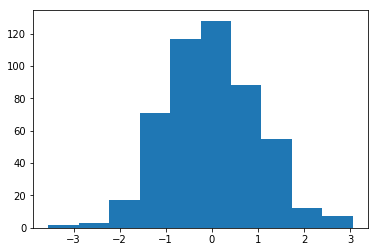

In [41]:
z_group =  double_grouped.transform(zscore)  # lo importante es el uso de la función de normalización!
plt.hist(z_group["Age"])                     # Y vemos que están normalizados (Campana)

In [43]:
# Un ejemplo súper útil de las transformaciones es cuando rellenamos información que no tenemos o incompleta (NA) con fillna
fillna_mean = lambda x: x.fillna(x.mean())
double_grouped.transform(fillna_mean)

,Height,Weight,Age,Incom
0,154.937557,94.631338,31.743540,19894.785173
1,140.352931,61.346379,20.574083,20185.805416
2,219.409511,72.530690,17.344611,18443.359332
3,181.499835,25.944781,34.145403,17971.059307
4,195.290362,67.949121,20.976135,12426.166203
5,173.806969,90.084685,35.999756,17390.838649
6,137.549830,43.717860,28.209443,25069.405005
7,156.269938,84.213981,15.472264,19276.099968
8,182.712436,88.137770,33.194516,26418.337075
9,132.307755,84.946686,40.488903,21272.801587


## Operaciones diversas muy útiles

In [44]:
# si trabajamos sobre los datos agrupados, por ejemplo tendremos el primer registro de cada uno de los grupos. 
double_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Incom
0,Female,Poor,154.937557,94.631338,31.743540,19894.785173
1,Female,Rich,140.352931,61.346379,20.574083,20185.805416
2,Male,Rich,219.409511,72.530690,17.344611,18443.359332
3,Male,Poor,181.499835,25.944781,34.145403,17971.059307
4,Female,Middle Class,195.290362,67.949121,20.976135,12426.166203
13,Male,Middle Class,164.204603,75.348605,18.848807,15400.746719


In [45]:
# Para otener el último registro de cada uno de los grupos. 
double_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Incom
477,Male,Poor,142.363718,63.654769,23.855278,14061.081921
478,Female,Rich,136.775216,57.149254,20.980820,14415.019664
491,Female,Middle Class,113.184993,41.128340,46.879146,24461.784193
496,Male,Rich,167.951182,75.864809,30.784543,17311.766086
498,Male,Middle Class,184.540534,80.033318,24.256132,21048.675926
499,Female,Poor,197.137071,84.678264,22.530557,18579.129426


In [46]:
# Para otener el n-ésimo registro de cada uno de los grupos. 
double_grouped.nth(32)       # en este ejemplo vamos por el 32-ésimo registro de cada grupo. 

Age      Height         Incom     Weight
Gender Economic Status                                                
Female Middle Class     35.243073  118.228478  16100.386331  27.018488
       Poor             22.614406  148.283078  13419.854271  88.685618
       Rich             26.272249  175.663456  17286.348912  35.837755
Male   Middle Class     51.450558  200.266552  16857.675150  79.084169
       Poor             44.259449  147.959805  20913.494877  82.932501
       Rich             17.415515  201.621831  16122.459029  99.876434

In [47]:
# Si se usa un número mayor que el número de registros, solo muestra los que tengan ese número 
double_grouped.nth(89)       

,,Age,Height,Incom,Weight
Gender,Economic Status,,,,
Male,Poor,43.334849,158.318991,14449.558842,47.249891


In [49]:
# También podemos ordenar los datos como queramos, en función de los valores de las columnas. 
data_sorted = data.sort_values(["Age", "Incom"])
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Incom
388,Male,Poor,110.482738,42.804403,-14.150275,22102.672822
107,Male,Rich,228.519471,74.927825,-6.074358,15728.703567
331,Female,Poor,166.476888,87.578859,-3.693577,14926.443699
358,Female,Poor,181.233237,83.877776,-3.135568,15621.373747
262,Male,Rich,165.702213,42.488205,-0.222654,22878.956474
353,Female,Middle Class,65.649645,49.589178,2.901385,10708.883609
441,Female,Poor,175.407738,88.494812,2.901514,19097.621693
347,Female,Middle Class,156.225727,34.386082,3.874418,22802.119288
222,Male,Middle Class,206.459694,32.480917,5.624697,14198.791340
456,Female,Poor,164.670661,101.143135,5.789356,16315.841669


In [52]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Incom
388,Male,Poor,110.482738,42.804403,-14.150275,22102.672822
331,Female,Poor,166.476888,87.578859,-3.693577,14926.443699


In [51]:
# Si queremos los más viejos.
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Incom
234,Male,Poor,158.283434,32.876812,65.638937,20652.807344
122,Female,Poor,120.442607,64.306751,67.906627,16023.264315


## Conjunto de entrenamiento y conjunto de testing

En Python hay 3 métodos para realizar la partición de un dataset en conjuntos de entrenamiento y testing. Vamos a ver ejemplos de los 3

In [56]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")
len(data)

3333

### Dividir utilizando la distribución normal 

División para obtener los conjuntos de entrenamiento y prueba de manera aleatoria utilizando la distribución normal. 

(array([  8.,  47., 243., 545., 836., 850., 538., 203.,  51.,  12.]),
 array([-3.35338583, -2.67676461, -2.00014338, -1.32352216, -0.64690094,
         0.02972028,  0.7063415 ,  1.38296273,  2.05958395,  2.73620517,
         3.41282639]),
 <a list of 10 Patch objects>)

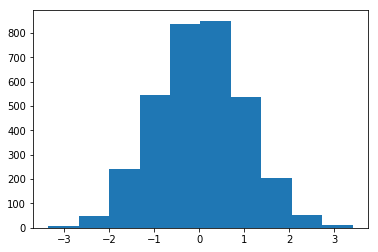

In [61]:
a = np.random.randn(len(data))
plt.hist(a)

In [66]:
check = (a<0.75)   # Se crea la condición del 80% para la partición de los datos
check

array([ True,  True,  True, ...,  True,  True,  True])

(array([ 747.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2586.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

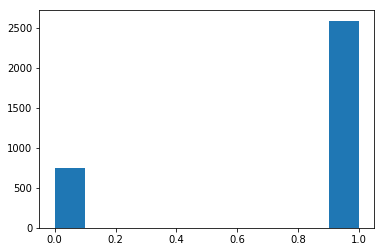

In [68]:
plt.hist(check.astype(int))

In [70]:
training = data[check]
testing = data[~check]

In [71]:
len(training)

2586

In [76]:
len(testing)

747

### Dividir utilizando la librería SKLEARN (scikit)

La forma más utilizada en general es la validación cruzada (cross_validation). 

In [83]:
from sklearn.model_selection import train_test_split as tts

In [84]:
#una vez esto importado, los parámetros para entrenamiento validación, dependen del método de aprendizaje. En este ejemplo: 
train, test = tts(data, test_size = 0.2)

In [85]:
len(train)

2666

In [86]:
len(test)

667

## Usando una función de shuffle 

Basado en un "desordenado" aleatorio y luego partiendo en porcentajes el dataset. 

In [94]:
import sklearn

In [95]:
data = sklearn.utils.shuffle(data)    #Se "baraja" el dataset. 

In [101]:
cut_index = int(0.75*len(data))
train_data = data[:cut_index] 
test_data = data[cut_index+1:]

In [102]:
len(train_data)

2499

In [103]:
len(test_data)

833